# Computation
***

Computation is a sub-field of computer science that explores types of problems where solution can be created using Computers [[0]](#toa-wikipedia), commonly when a computer comes to mind, its is though of as a physical machine, but it can be anything that can do computation, these were abstract machines before the dawn of modern computing.

A computer is something that can do computations automatically, the theory of automation is called automata.

# Growth Rates

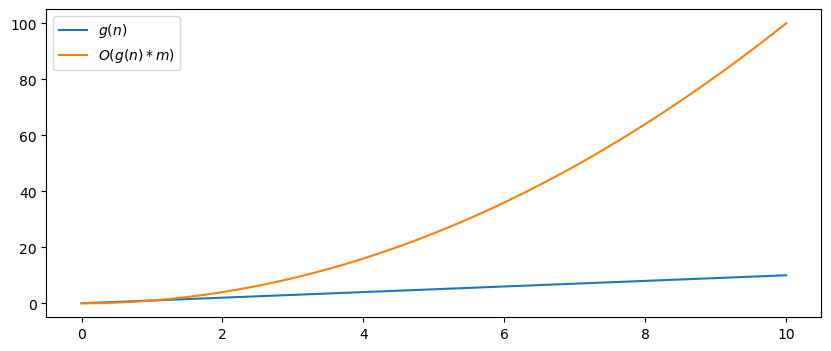

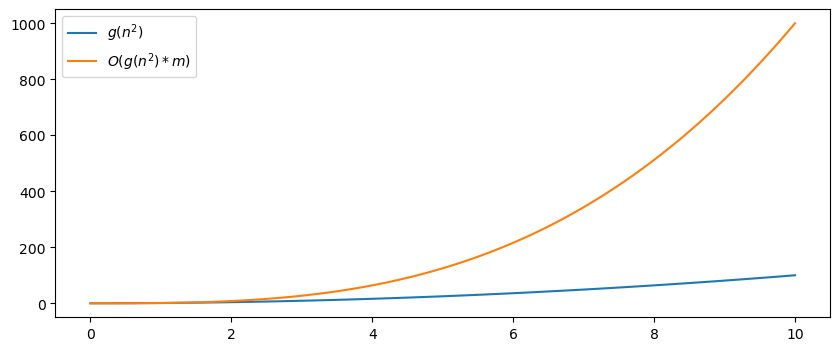

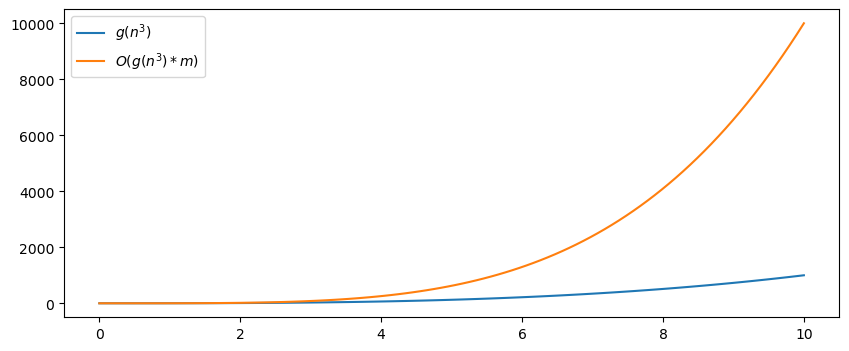

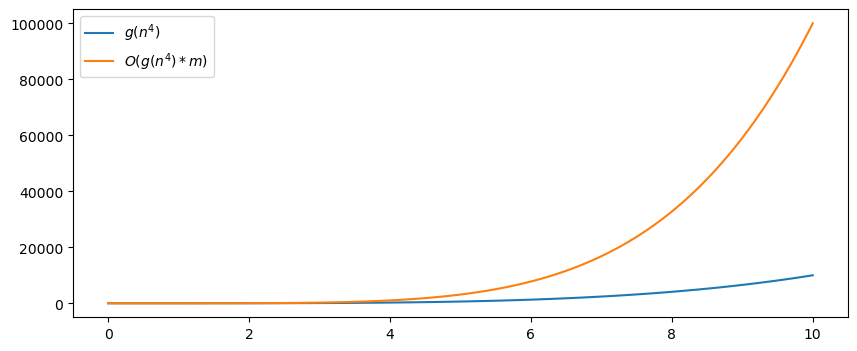

C:\Users\Chrysaor\AppData\Local\Temp\ipykernel_1040\1370318.py:19: RuntimeWarning: divide by zero encountered in log
  ax.plot(x, function_list[plot_i - 1]["func"](x), label="${}$".format(function_list[plot_i - 1]["latex_label"]))
C:\Users\Chrysaor\AppData\Local\Temp\ipykernel_1040\1370318.py:22: RuntimeWarning: divide by zero encountered in log
  ax.plot(x, function_list[plot_i - 1]["func"](x) * x, label=g_latex)
C:\Users\Chrysaor\AppData\Local\Temp\ipykernel_1040\1370318.py:22: RuntimeWarning: invalid value encountered in multiply
  ax.plot(x, function_list[plot_i - 1]["func"](x) * x, label=g_latex)


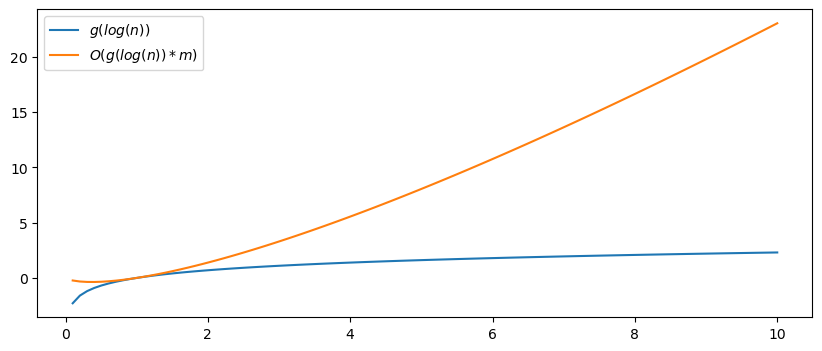

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

function_list = [
    {"func": lambda x: x, "latex_label": "g(n)"},# Linear
    {"func": lambda x: x ** 2, "latex_label": "g(n^2)"}, # Square
    {"func": lambda x: x ** 3, "latex_label": "g(n^3)"}, # Cubic
    {"func": lambda x: x ** 4, "latex_label": "g(n^4)"}, # Power of Four
    {"func": np.log, "latex_label": "g(log(n))"}, # Logarithm
]

for plot_i in range(1, len(function_list) + 1):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    x = np.linspace(0.0, 10.0, 100)

    ax.plot(x, function_list[plot_i - 1]["func"](x), label="${}$".format(function_list[plot_i - 1]["latex_label"]))

    g_latex = "$O({} * m)$".format(function_list[plot_i - 1]["latex_label"])
    ax.plot(x, function_list[plot_i - 1]["func"](x) * x, label=g_latex)
    
    ax.legend()
    plt.show()

# Turing Machine

In [2]:
def run_turing_machine(tape, table, debug_messages=False):
    pos = 0 # Position on tape.
    state = 'X' # Initial state is first in table.

    # Keep going while we are not in a halting state.
    while state not in ['T', 'F']:
        # Print the current status.
        if debug_messages:
            print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
        # Get the row of the table.
        row = table[(state, tape[pos])]
        # Overwrite the symbol.
        tape[pos] = row[0]
        # Move left or right.
        if row[1] == 'R':
            # Put blanks on tape as necessary.
            if pos == len(tape) - 1:
                tape += ['_']
            # Increase position.
            pos += 1
        else:
            # Put blanks on tape as necessary.
            if pos == 0:
                tape = ['_'] + tape
                # The position on the tape has to move with it.
                pos += 1
            # Decrease position.
            pos -= 1
        # Update the state.
        state = row[2]

    # Print the current status.
    if debug_messages:
        print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
        
    return state

def contain_all_zero(tape, debug_messages=False):
    # State table.
    table = {
        ('X', '_'): ['_', 'R', 'T'],
        ('X', '0'): ['0', 'R', 'X'],
        ('X', '1'): ['1', 'R', 'Y'],
        ('Y', '_'): ['_', 'R', 'F'],
        ('Y', '0'): ['0', 'R', 'Y'],
        ('Y', '1'): ['1', 'R', 'Y'],
    }

    return run_turing_machine(tape, table, debug_messages) == 'T'

In [3]:
# Tape input.
tape = list('0101111')
contain_all_zero(tape, True)

test_cases = [
    (list("0101111"), False),
    (list("1111111"), False),
    (list("1101110"), False),
    (list("0000000"), True)
]

all_test_pass = all([contain_all_zero(test[0]) == test[1] for test in test_cases])

if all_test_pass:
    print("All tests pass")

X0101111
0X101111
01Y01111
010Y1111
0101Y111
01011Y11
010111Y1
0101111Y_
0101111_F_
All tests pass


The code above is derived from [[2]](#03-computation) Ian McLoughlins, 03-computation.ipynb notebook, I have turned it into a function to allow for reuse, and added some test cases, it currently returns True if a input contains all zeros, else returns True.

# Complex Number Arithemtic

In [4]:
def add_lists(x, y):
    return [(x[i] + y[i]) for i in range(len(x))]

def mul_lists(x, y):
    a1, b1 = x
    a2, b2 = y
    return [a1 * a2 - b1 * b2, a1 * b2 + b1 * a2]

list_1, list_2 = [3, 5], [-2, 7]

sum_of_two_lists = add_lists(list_1, list_2)
print(f"The sum of the two lists is: {sum_of_two_lists}")

product_of_two_lists = mul_lists(list_1, list_2)
print(f"The product of the two lists is: {product_of_two_lists}")

The sum of the two lists is: [1, 12]
The product of the two lists is: [-41, 11]


In [5]:
# In python complex numbers are abstracted into a class
# There is methods overriding the arithmetic operations
class Complex:
    def __init__(self, a, b):
        self.a, self.b = a, b
        
    def __add__(self, other):
        return Complex(self.a + other.a, self.b + other.b)
    
    def __mul__(self, other):
        return Complex(self.a * other.a - self.b * other.b,
                self.a * other.b + self.b * other.a)
    
    def __str__(self):
        return f"Complex({self.a}, {self.b})"
    
print(f"Complex(3, 5j) * Complex(-2, 7j): {Complex(3, 5) * Complex(-2, 7)}")
print(f"(3 + 5j) * (-2 + 7j): {(3 + 5j) * (-2 + 7j)}")

Complex(3, 5j) * Complex(-2, 7j): Complex(-41, 11)
(3 + 5j) * (-2 + 7j): (-41+11j)


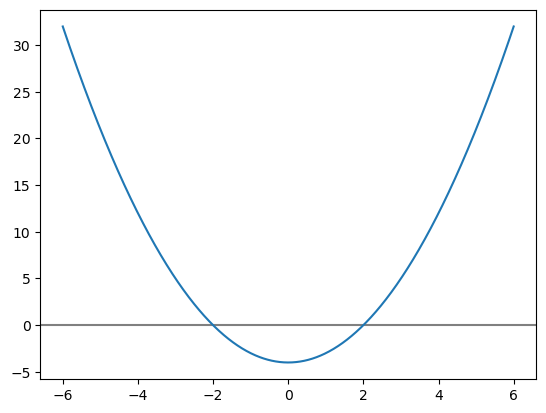

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1000)
y = x ** 2 - 4

fig, ax = plt.subplots()
ax.axhline(0, color="grey")

ax.plot(x, y)
plt.show()

# References
[0] <a id="toa-wikipedia"></a>https://en.wikipedia.org/wiki/Theory_of_computation<br>
[1] https://www.youtube.com/watch?v=0D7yInuKvKs<br>
[2] <a id="03-computation"></a>https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/03-computation.ipynb<br>
[3] https://introcs.cs.princeton.edu/java/52turing